In [42]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [53]:
df1 = pd.read_csv('school_data_jun_by_pref.csv')
df1.head()

,prefecture,futoko_rate_jun,ijime_per_thou_jun,rate_OII_jun,classes_jun
0,Hokkaido,0.72,NaN,0.00,3150
1,Hokkaido,0.80,NaN,0.00,3150
2,Hokkaido,0.84,NaN,0.01,3150
3,Hokkaido,0.87,NaN,0.00,3150
4,Hokkaido,0.96,NaN,0.01,3150


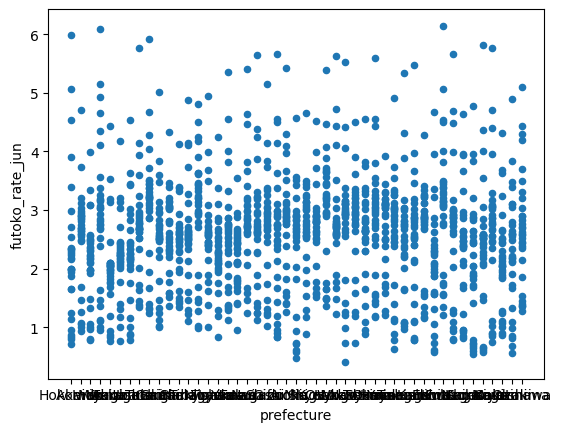

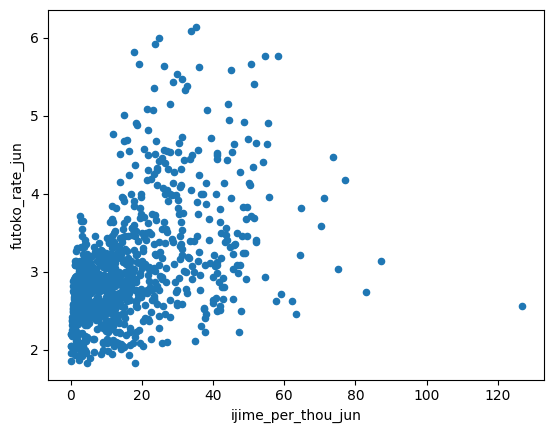

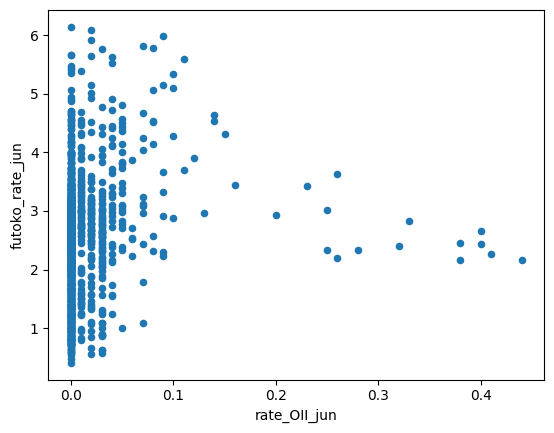

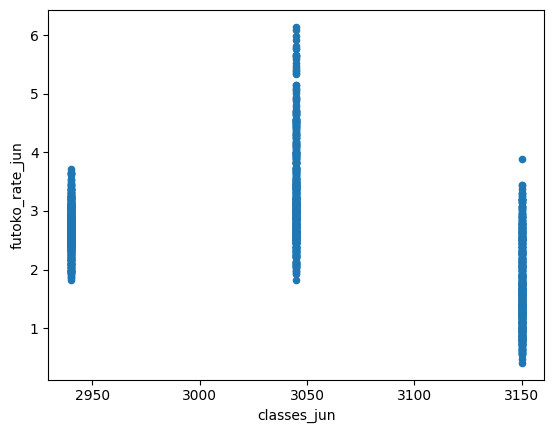

In [54]:
for i in df1.columns:
    if i == 'futoko_rate_jun':
        continue
    df1.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [55]:
#外れ値の削除
outline = df1[(df1['ijime_per_thou_jun']>120)].index
df2 = df1.drop(outline, axis = 0)
outline

Int64Index([1416], dtype='int64')

In [65]:
#欠損値の処理
df2 = df2.dropna(how = 'any')
df2.head()

,prefecture,futoko_rate_jun,ijime_per_thou_jun,rate_OII_jun,classes_jun
11,Hokkaido,1.95,4.38,0.01,2940
12,Hokkaido,1.97,4.37,0.00,2940
13,Hokkaido,2.00,4.05,0.00,2940
14,Hokkaido,1.99,2.96,0.00,2940
15,Hokkaido,2.16,18.16,0.00,2940


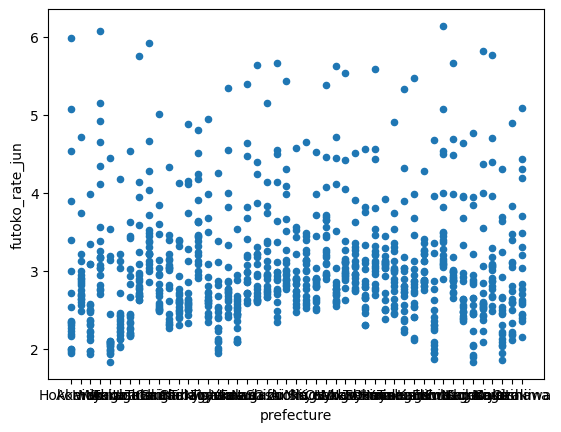

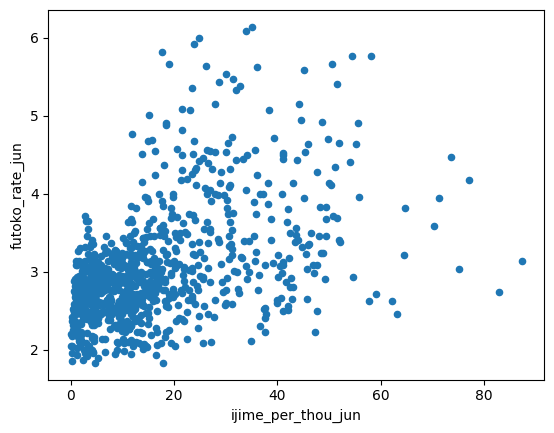

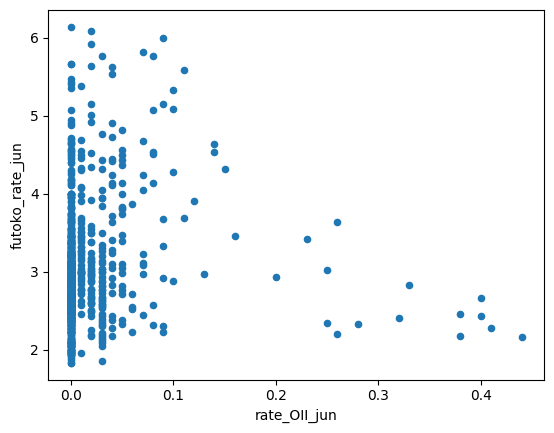

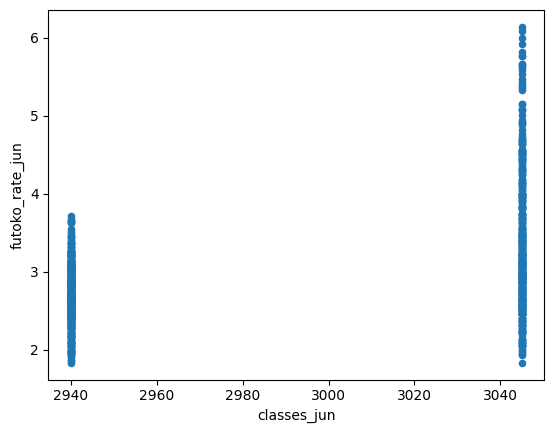

In [59]:
for i in df2.columns:
    if i == 'futoko_rate_jun':
        continue
    df2.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [60]:
#標準化する
df3 = df2.drop(['prefecture'], axis = 1)
sc = StandardScaler()
sc.fit(df3)
sc_df3 = sc.transform(df3)
sc_df4 = pd.DataFrame(sc_df3, columns = df3.columns)
sc_df4.head()

,futoko_rate_jun,ijime_per_thou_jun,rate_OII_jun,classes_jun
0,-1.463463,-0.815907,-0.096108,-0.998936
1,-1.436110,-0.816593,-0.316757,-0.998936
2,-1.395081,-0.838566,-0.316757,-0.998936
3,-1.408758,-0.913412,-0.316757,-0.998936
4,-1.176259,0.130304,-0.316757,-0.998936


In [61]:
#多項式特徴量、交互作用特徴量を出してみる
df4 = sc_df4.loc[:, 'ijime_per_thou_jun':]
poly = PolynomialFeatures(degree = 2)
df5 = poly.fit_transform(df4)
poly.get_feature_names_out()

array(['1', 'ijime_per_thou_jun', 'rate_OII_jun', 'classes_jun',
       'ijime_per_thou_jun^2', 'ijime_per_thou_jun rate_OII_jun',
       'ijime_per_thou_jun classes_jun', 'rate_OII_jun^2',
       'rate_OII_jun classes_jun', 'classes_jun^2'], dtype=object)

In [62]:
#先ほど出した多項式特徴量、交互作用特徴量をデータフレームにする
df6 = pd.DataFrame(df5, columns = ['1', 'ijime_per_thou_jun', 'rate_OII_jun', 'classes_jun',
       'ijime_per_thou_jun^2', 'ijime_per_thou_jun rate_OII_jun',
       'ijime_per_thou_jun classes_jun', 'rate_OII_jun^2',
       'rate_OII_jun classes_jun', 'classes_jun^2'])
df6.head()

,1,ijime_per_thou_jun,rate_OII_jun,classes_jun,ijime_per_thou_jun^2,ijime_per_thou_jun rate_OII_jun,ijime_per_thou_jun classes_jun,rate_OII_jun^2,rate_OII_jun classes_jun,classes_jun^2
0,1.0,-0.815907,-0.096108,-0.998936,0.665704,0.078415,0.815038,0.009237,0.096006,0.997872
1,1.0,-0.816593,-0.316757,-0.998936,0.666825,0.258662,0.815724,0.100335,0.316420,0.997872
2,1.0,-0.838566,-0.316757,-0.998936,0.703194,0.265622,0.837674,0.100335,0.316420,0.997872
3,1.0,-0.913412,-0.316757,-0.998936,0.834321,0.289330,0.912440,0.100335,0.316420,0.997872
4,1.0,0.130304,-0.316757,-0.998936,0.016979,-0.041275,-0.130165,0.100335,0.316420,0.997872


In [63]:
#’futoko_rate_jun’を戻して'1'を削除
df6['futoko_rate_jun'] = sc_df4['futoko_rate_jun']
df7 = df6.drop(['1'], axis = 1)
df7.head()

,ijime_per_thou_jun,rate_OII_jun,classes_jun,ijime_per_thou_jun^2,ijime_per_thou_jun rate_OII_jun,ijime_per_thou_jun classes_jun,rate_OII_jun^2,rate_OII_jun classes_jun,classes_jun^2,futoko_rate_jun
0,-0.815907,-0.096108,-0.998936,0.665704,0.078415,0.815038,0.009237,0.096006,0.997872,-1.463463
1,-0.816593,-0.316757,-0.998936,0.666825,0.258662,0.815724,0.100335,0.316420,0.997872,-1.436110
2,-0.838566,-0.316757,-0.998936,0.703194,0.265622,0.837674,0.100335,0.316420,0.997872,-1.395081
3,-0.913412,-0.316757,-0.998936,0.834321,0.289330,0.912440,0.100335,0.316420,0.997872,-1.408758
4,0.130304,-0.316757,-0.998936,0.016979,-0.041275,-0.130165,0.100335,0.316420,0.997872,-1.176259


In [64]:
#相関係数を出してみる
abs(df7.corr()['futoko_rate_jun']).sort_values(ascending=False)

futoko_rate_jun                    1.000000
ijime_per_thou_jun                 0.486805
classes_jun^2                      0.407205
classes_jun                        0.407205
ijime_per_thou_jun classes_jun     0.257276
ijime_per_thou_jun^2               0.217824
ijime_per_thou_jun rate_OII_jun    0.161680
rate_OII_jun classes_jun           0.120093
rate_OII_jun                       0.073968
rate_OII_jun^2                     0.055126
Name: futoko_rate_jun, dtype: float64

In [67]:
#特徴量と正解データに分割
col = ['ijime_per_thou_jun', 'classes_jun']
x = df7[col]
t = df7['futoko_rate_jun']

In [68]:
#訓練データとテストデータの分割
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0)

#モデルを作成し学習させる
model = LinearRegression()
model.fit(x_train,y_train) 

LinearRegression()

In [69]:
model.score(x_test, y_test)

0.22868745771636456